In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('ushape.csv')

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

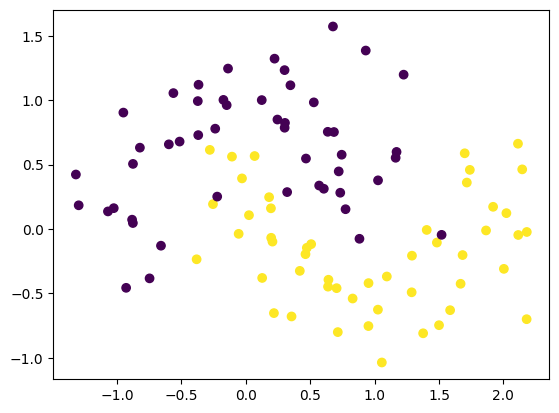

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression()


In [11]:
clf.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<Axes: >

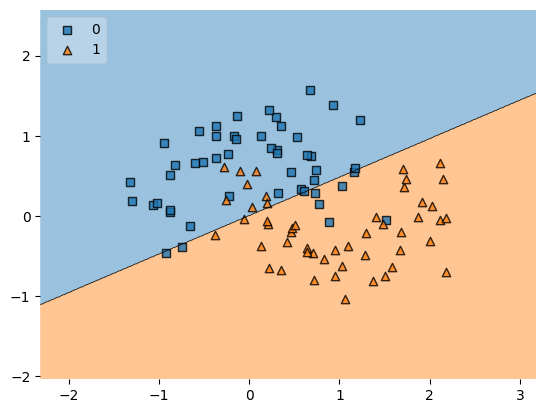

In [29]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X,y.astype('int'),clf,legend=2)

In [14]:
from sklearn.model_selection import cross_val_score 
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

np.float64(0.8300000000000001)

In [15]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree=3,include_bias=False)
X_trf = poly.fit_transform(X)

In [16]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,X_trf,y,scoring='accuracy',cv=10))

np.float64(0.9099999999999999)

In [17]:
def plot_decision_boundary(X,y,degree=1):
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a = np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1,step=0.01)
    b = np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1,step=0.01)
    
    XX,YY = np.meshgrid(a,b)
    
    input_array = np.array([XX.ravel(),YY.ravel()]).T
    
    labels = clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.title(f'Degree = {degree}, accuracy = {np.round(accuracy,4)}')
    plt.show()

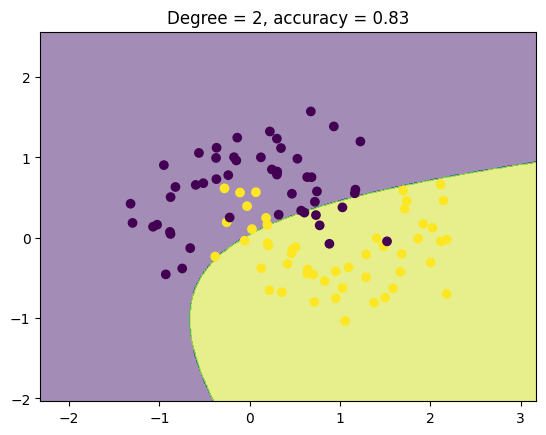

In [22]:
plot_decision_boundary(X,y,degree=2)

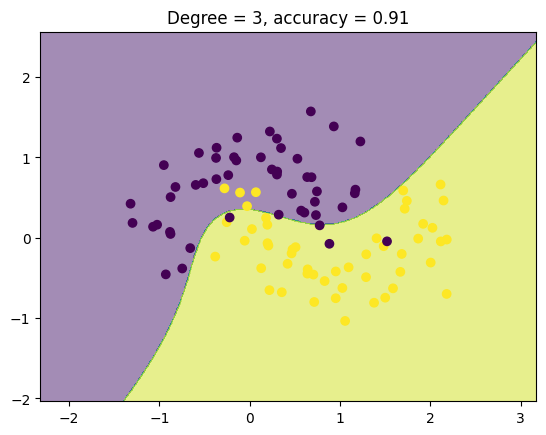

In [23]:
plot_decision_boundary(X,y,degree=3)


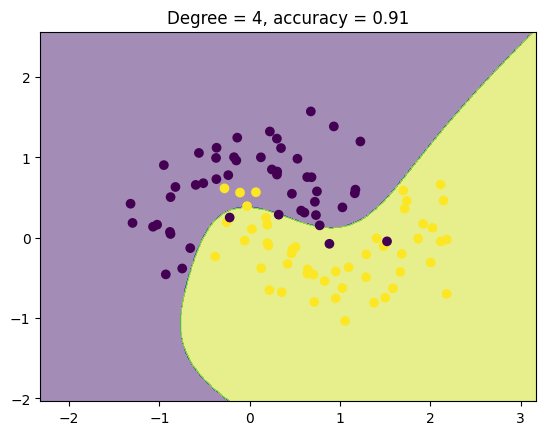

In [24]:
plot_decision_boundary(X,y,degree=4)


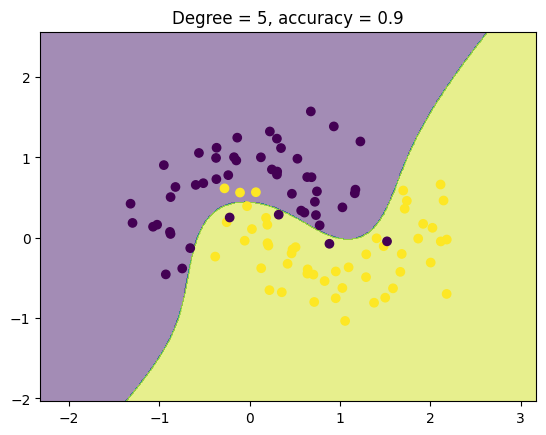

In [25]:
plot_decision_boundary(X,y,degree=5)


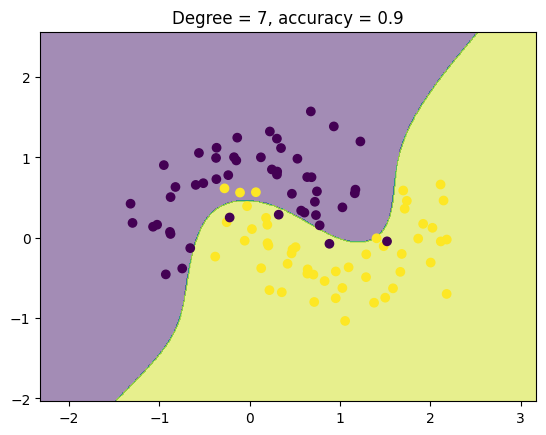

In [27]:
plot_decision_boundary(X,y,degree=7)
